## Named Entity Recognition using LSTMs (with Character + Word Embeddings)

In this notebook we train a Bidirectional LSTM model for Named Entity Recognition on CoNLL English dataset.

Dataset: CoNLL 2003 English Dataset

## 1. Using NLTK CoNLL Reader 

In [3]:
from nltk.corpus.reader.conll import ConllCorpusReader

In [4]:
raw = open('data/eng.train', 'r',encoding="Latin-1").readlines()

print(raw[:50])

['-DOCSTART- -X- O O\n', '\n', 'EU NNP I-NP I-ORG\n', 'rejects VBZ I-VP O\n', 'German JJ I-NP I-MISC\n', 'call NN I-NP O\n', 'to TO I-VP O\n', 'boycott VB I-VP O\n', 'British JJ I-NP I-MISC\n', 'lamb NN I-NP O\n', '. . O O\n', '\n', 'Peter NNP I-NP I-PER\n', 'Blackburn NNP I-NP I-PER\n', '\n', 'BRUSSELS NNP I-NP I-LOC\n', '1996-08-22 CD I-NP O\n', '\n', 'The DT I-NP O\n', 'European NNP I-NP I-ORG\n', 'Commission NNP I-NP I-ORG\n', 'said VBD I-VP O\n', 'on IN I-PP O\n', 'Thursday NNP I-NP O\n', 'it PRP B-NP O\n', 'disagreed VBD I-VP O\n', 'with IN I-PP O\n', 'German JJ I-NP I-MISC\n', 'advice NN I-NP O\n', 'to TO I-PP O\n', 'consumers NNS I-NP O\n', 'to TO I-VP O\n', 'shun VB I-VP O\n', 'British JJ I-NP I-MISC\n', 'lamb NN I-NP O\n', 'until IN I-SBAR O\n', 'scientists NNS I-NP O\n', 'determine VBP I-VP O\n', 'whether IN I-SBAR O\n', 'mad JJ I-NP O\n', 'cow NN I-NP O\n', 'disease NN I-NP O\n', 'can MD I-VP O\n', 'be VB I-VP O\n', 'transmitted VBN I-VP O\n', 'to TO I-PP O\n', 'sheep NN I-

In [5]:
root = 'data/'
fileid = "eng.train"

WORDS = 'words'

POS = 'pos'

CHUNK = 'chunk'

NE = 'ne'

reader = ConllCorpusReader(root, fileid, (WORDS, POS, CHUNK, NE))

In [6]:
# #To Get Words

# print(reader.words())

# #To Get Sentences

# print(reader.sents())

# #To Get Tagged Words

# print(reader.tagged_words())

# #To Get Tagged Sentences

# print(reader.tagged_sents())

# #To Get Chunked Words

# print(reader.chunked_words())

# #To Get Chunked Sentences

#print(reader.chunked_sents())

# #To Get Parsed Sentences

# print(reader.parsed_sents())

#print(reader.iob_words())
grid = reader._grids()
#print(reader._get_iob_words(reader._grids()))

#print(reader._get_iob_words(reader._grids(), columns=['ne']))

#reader._get_iob_words(reader._grids(), columns=['chunk', 'ne'])
import numpy as np

In [7]:
sentences = list(grid) 

#Removing the first empty entry
sentences = sentences[1:]

print((sentences[0]))

[['EU', 'NNP', 'I-NP', 'I-ORG'], ['rejects', 'VBZ', 'I-VP', 'O'], ['German', 'JJ', 'I-NP', 'I-MISC'], ['call', 'NN', 'I-NP', 'O'], ['to', 'TO', 'I-VP', 'O'], ['boycott', 'VB', 'I-VP', 'O'], ['British', 'JJ', 'I-NP', 'I-MISC'], ['lamb', 'NN', 'I-NP', 'O'], ['.', '.', 'O', 'O']]


In [8]:
all_words = (reader.words())

print(len(all_words))

203621


In [10]:
words = list(set(all_words))
words.append("ENDPAD")

n_words = len(words)

print(n_words)

23624


In [11]:
#No of sentences
print(len(sentences))

14986


In [12]:
all_tags_in_sentence = [[c[3] for c in sentence] for sentence in sentences]
all_tags = []

for sentence in all_tags_in_sentence:
    for c in sentence:
        all_tags.append(c)

print((all_tags[:5]))
print(len(all_tags))

['I-ORG', 'O', 'I-MISC', 'O', 'O']
203621


In [13]:
tags = set(all_tags)

print(tags)

n_tags = len(tags); n_tags

{'B-MISC', 'I-MISC', 'I-PER', 'I-LOC', 'B-LOC', 'I-ORG', 'B-ORG', 'O'}


8

In [14]:
all_pos_in_sentence = [[c[1] for c in sentence] for sentence in sentences]
all_pos = []

for sentence in all_pos_in_sentence:
    for c in sentence:
        all_pos.append(c)

print((all_pos[:5]))
print(len(all_pos))

['NNP', 'VBZ', 'JJ', 'NN', 'TO']
203621


In [16]:
pos = set(all_pos)
print(pos)
n_pos = len(pos); n_pos

{'VBP', 'JJR', 'NNP', 'VBG', 'WRB', 'WP$', 'LS', 'UH', "''", ')', 'VBZ', 'VBD', 'VB', 'NNPS', 'IN', '"', 'PRP', 'EX', 'CD', 'NN', 'TO', '.', 'VBN', '(', 'DT', 'RBS', 'RB', 'WP', 'NNS', 'SYM', 'JJS', 'CC', 'WDT', 'RBR', '$', 'MD', 'PDT', 'RP', ':', ',', 'JJ', 'FW', 'NN|SYM', 'PRP$', 'POS'}


45

In [13]:
all_chunk_in_sentence = [[c[2] for c in sentence] for sentence in sentences]
all_chunk = []

for sentence in all_chunk_in_sentence:
    for c in sentence:
        all_chunk.append(c)

print((all_chunk[:5]))
print(len(all_chunk))

['I-NP', 'I-VP', 'I-NP', 'I-NP', 'I-VP']
203621


In [14]:
chunks = set(all_chunk)

n_chunks = len(chunks); n_chunks

17

### 2. Preparing the Data 

In [15]:
max_len = 65
print(max_len)

word2idx = {w: i + 2 for i, w in enumerate(words)}
word2idx["UNK"] = 1
word2idx["PAD"] = 0
idx2word = {i: w for w, i in word2idx.items()}

tag2idx = {t: i + 1 for i, t in enumerate(tags)}
tag2idx["PAD"] = 0
idx2tag = {i: w for w, i in tag2idx.items()}

pos2idx = {t: i + 1 for i, t in enumerate(pos)}
pos2idx["PAD"] = 0
idx2pos = {i: w for w, i in pos2idx.items()}

chunks2idx = {t: i + 1 for i, t in enumerate(chunks)}
chunks2idx["PAD"] = 0
idx2chunks = {i: w for w, i in chunks2idx.items()}

65


### 3. Padding Sequences

In [177]:
from keras.preprocessing.sequence import pad_sequences
X_word = [[word2idx[w[0]] for w in s] for s in sentences]
X_word = pad_sequences(maxlen=max_len, sequences=X_word, value=word2idx["PAD"], padding='post', truncating='post')

X_pos = [[pos2idx[w[1]] for w in s] for s in sentences]
X_pos = pad_sequences(maxlen=max_len, sequences=X_pos, value=pos2idx["PAD"], padding='post', truncating='post')

X_chunk = [[chunks2idx[w[2]] for w in s] for s in sentences]
X_chunk = pad_sequences(maxlen=max_len, sequences=X_chunk, value=chunks2idx["PAD"], padding='post', truncating='post')

In [17]:
print(X_word[:5])

[[17005 10251 10314  8852 16781 10366 12416  3875 20624     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0]
 [21988  2030     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0]
 [11075 19326     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0   

In [18]:
y = [[tag2idx[w[3]] for w in s] for s in sentences]
y = pad_sequences(maxlen=max_len, sequences=y, value=tag2idx["PAD"], padding='post', truncating='post')

In [178]:
from sklearn.model_selection import train_test_split
X_word_tr, X_word_te, y_tr, y_te = train_test_split(X_word, y, test_size=0.1, random_state=2018)

X_pos_tr, X_pos_te, _, _ = train_test_split(X_pos, y, test_size=0.1, random_state=2018)

X_chunk_tr, X_chunk_te, _, _ = train_test_split(X_chunk, y, test_size=0.1, random_state=2018)


print(X_word_tr.shape)
print(X_word_te[0])
print(X_pos_tr.shape)
print(X_pos_te.shape)
print(X_chunk_tr.shape)
print(X_chunk_te.shape)
print(y_tr.shape)
print(y_te.shape)

(13487, 65)
[20202 10860 13764     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0]
(13487, 65)
(1499, 65)
(13487, 65)
(1499, 65)
(13487, 65)
(1499, 65)


In [94]:
from keras.models import Model, Input
from keras_contrib.layers import CRF
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Conv1D
from keras.layers import Bidirectional, concatenate, Flatten, SpatialDropout1D, GlobalMaxPooling1D

In [25]:
# # input and embedding for words
# word_in = Input(shape=(max_len,))
# emb_word = Embedding(input_dim=n_words+2, output_dim=20,
#                      input_length=max_len, mask_zero=True)(word_in)

# # input and embedding for pos
# pos_input = Input(shape=(max_len,))
# pos_emb = Embedding(input_dim=n_pos, output_dim=10,
#                     input_length=max_len, mask_zero=True)(pos_input)

# # input and embedding for chunk
# chunk_input = Input(shape=(max_len,))
# chunk_emb = Embedding(input_dim=n_chunks, output_dim=10,
#                     input_length=max_len, mask_zero=True)(chunk_input)

# # main LSTM
# x = concatenate([emb_word, pos_emb, chunk_emb])
# x = SpatialDropout1D(0.3)(x)
# main_lstm = Bidirectional(LSTM(units=50, return_sequences=True,
#                                recurrent_dropout=0.6))(x)
# out = TimeDistributed(Dense(n_tags + 1, activation="sigmoid"))(main_lstm)

# model = Model([word_in, pos_input, chunk_input], out)

In [142]:
# input and embedding for words
word_in = Input(shape=(max_len,))
emb_word = Embedding(input_dim=n_words+2, output_dim=20,
                     input_length=max_len, mask_zero=True)(word_in)

# input and embedding for pos
pos_input = Input(shape=(max_len,))
pos_emb = Embedding(input_dim=n_pos+2, output_dim=20,
                    input_length=max_len, mask_zero=True)(pos_input)

# input and embedding for chunk
chunk_input = Input(shape=(max_len,))
chunk_emb = Embedding(input_dim=n_chunks+2, output_dim=20,
                    input_length=max_len, mask_zero=True)(chunk_input)

# main LSTM
x = concatenate([emb_word, pos_emb, chunk_emb])
x = SpatialDropout1D(0.3)(x)
main_lstm = Bidirectional(LSTM(units=50, return_sequences=True,
                               recurrent_dropout=0.6))(x)
out = TimeDistributed(Dense(n_tags+1, activation="sigmoid"))(main_lstm)
model = Model([word_in, pos_input, chunk_input], out)

In [143]:
print(word_in.shape)
print(emb_word.shape)
print(pos_input.shape)
print(pos_emb.shape)
print(chunk_input.shape)
print(chunk_emb.shape)
print(main_lstm.shape)
print(x.shape)

print(out.shape)

(?, 65)
(?, 65, 20)
(?, 65)
(?, 65, 20)
(?, 65)
(?, 65, 20)
(?, ?, 100)
(?, 65, 60)
(?, 65, 9)


In [154]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [155]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_58 (InputLayer)           (None, 65)           0                                            
__________________________________________________________________________________________________
input_59 (InputLayer)           (None, 65)           0                                            
__________________________________________________________________________________________________
input_60 (InputLayer)           (None, 65)           0                                            
__________________________________________________________________________________________________
embedding_58 (Embedding)        (None, 65, 20)       472520      input_58[0][0]                   
__________________________________________________________________________________________________
embedding_

In [156]:
np.array(y_tr).reshape(len(y_tr), max_len, 1).shape

(13487, 65, 1)

In [157]:
history = model.fit([X_word_tr, 
                     X_pos_tr, 
                     X_chunk_tr], 
                    np.array(y_tr).reshape(len(y_tr), max_len, 1), 
                    batch_size=32, epochs=10, validation_split=0.1, verbose=1)

Train on 12138 samples, validate on 1349 samples
Epoch 1/10
12138/12138 [==============================] - 50s 4ms/step - loss: 0.6554 - acc: 0.8292 - val_loss: 0.3544 - val_acc: 0.8292
Epoch 2/10
12138/12138 [==============================] - 44s 4ms/step - loss: 0.2999 - acc: 0.8565 - val_loss: 0.2543 - val_acc: 0.8867
Epoch 3/10
12138/12138 [==============================] - 44s 4ms/step - loss: 0.2020 - acc: 0.9190 - val_loss: 0.1841 - val_acc: 0.9413
Epoch 4/10
12138/12138 [==============================] - 45s 4ms/step - loss: 0.1311 - acc: 0.9579 - val_loss: 0.1473 - val_acc: 0.9573
Epoch 5/10
12138/12138 [==============================] - 44s 4ms/step - loss: 0.0897 - acc: 0.9743 - val_loss: 0.1180 - val_acc: 0.9671
Epoch 6/10
12138/12138 [==============================] - 44s 4ms/step - loss: 0.0637 - acc: 0.9824 - val_loss: 0.1037 - val_acc: 0.9721
Epoch 7/10
12138/12138 [==============================] - 44s 4ms/step - loss: 0.0476 - acc: 0.9873 - val_loss: 0.0995 - val_acc:

In [183]:
import pandas as pd

hist = pd.DataFrame(history.history)

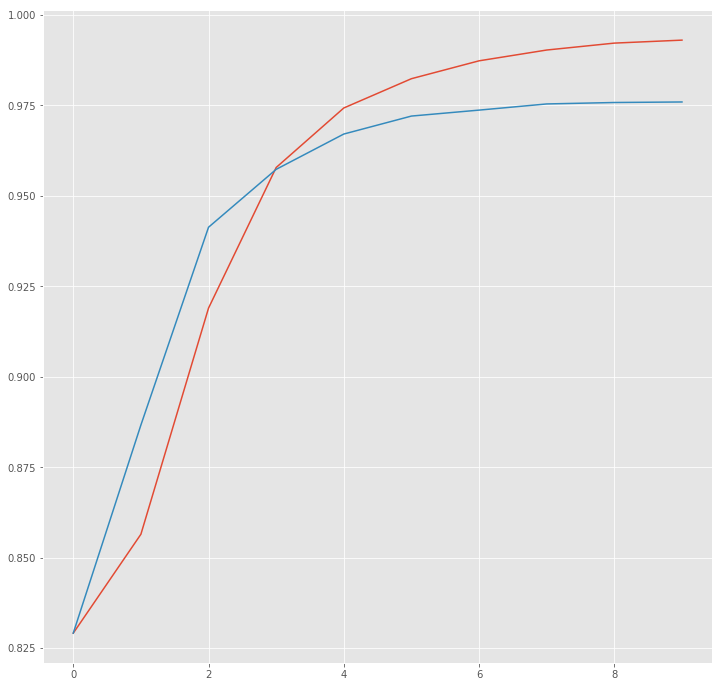

In [184]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
plt.figure(figsize=(12,12))
plt.plot(hist["acc"])
plt.plot(hist["val_acc"])
plt.show()

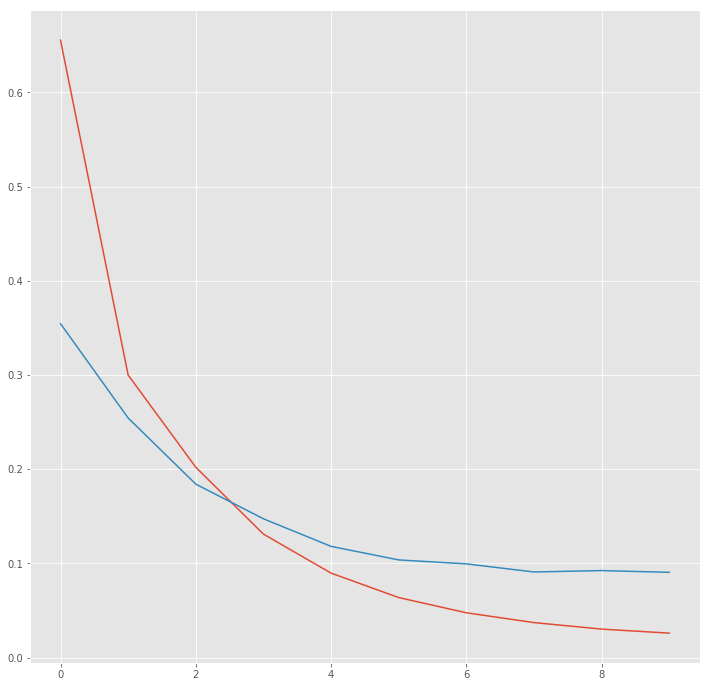

In [161]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
plt.figure(figsize=(12,12))
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.show()

In [164]:
y_pred = model.predict([X_word_te, X_pos_te, X_chunk_te])

In [182]:
i = 1003
p = np.argmax(y_pred[i], axis=-1)
print("{:15}||{:5}||{}".format("Word", "True", "Pred"))
print(30 * "=")
for w, t, pred in zip(X_word_te[i], y_te[i], p):
    if w != 0:
        print("{:15}: {:5} {}".format(idx2word[w], idx2tag[t], idx2tag[pred]))

Word           ||True ||Pred
In             : O     O
Kansas         : I-LOC I-LOC
City           : I-LOC I-LOC
,              : O     O
Travis         : I-PER I-LOC
Fryman         : I-PER I-PER
doubled        : O     O
in             : O     O
the            : O     O
go-ahead       : O     O
run            : O     O
in             : O     O
the            : O     O
fifth          : O     O
and            : O     O
Melvin         : I-PER I-PER
Nieves         : I-PER I-PER
and            : O     O
Damion         : I-PER I-PER
Easley         : I-PER I-PER
belted         : O     O
two-run        : O     O
homers         : O     O
as             : O     O
the            : O     O
Detroit        : I-ORG I-ORG
Tigers         : I-ORG I-ORG
claimed        : O     O
a              : O     O
10-3           : O     O
win            : O     O
over           : O     O
the            : O     O
Royals         : I-ORG I-ORG
,              : O     O
handing        : O     O
them           : O     O
th